# Tuganbaev/Elinav 2020 Paper

author: Tanya Kumar (tkumar@health.ucsd.edu)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
weighted_Unifrac = pd.read_csv('../data/Tuganbaev_Elinav/filtered_rarefied_weighted_unifrac_dm.tsv', sep='\t', index_col = 0)

In [3]:
weighted_Unifrac.head()

,A1,A2,A3,A4,A5,A6,B1,B2,B3,B4,...,G3,G4,G5,G6,H1,H2,H3,H4,H5,H6
A1,0.000000,0.119335,0.151476,0.145690,0.169502,0.164934,0.115131,0.459222,0.143551,0.118797,...,0.225113,0.189453,0.150863,0.189359,0.139969,0.146164,0.213554,0.181565,0.209196,0.197500
A2,0.119335,0.000000,0.107982,0.189113,0.147258,0.124290,0.153616,0.478665,0.075708,0.121173,...,0.125696,0.135231,0.157655,0.163675,0.091737,0.091415,0.129441,0.092891,0.156456,0.118436
A3,0.151476,0.107982,0.000000,0.172421,0.168707,0.069448,0.144399,0.537199,0.071073,0.111566,...,0.181075,0.146575,0.117309,0.180188,0.093989,0.074761,0.153602,0.099649,0.103742,0.110980
A4,0.145690,0.189113,0.172421,0.000000,0.178034,0.170162,0.113776,0.486184,0.208986,0.145088,...,0.280674,0.217801,0.116994,0.196012,0.210162,0.214605,0.237677,0.214554,0.239441,0.218320
A5,0.169502,0.147258,0.168707,0.178034,0.000000,0.173183,0.136664,0.427233,0.158784,0.126636,...,0.221235,0.149353,0.142326,0.159797,0.120536,0.187684,0.153717,0.138799,0.229118,0.142733


In [4]:
lum_muc_metadata = pd.read_csv('../data/Tuganbaev_Elinav/Tb_metadata_lum_muc.txt', sep='\t', index_col=0)
lum_muc_metadata.head()

,unique_id,run_id,description,fastq_R1,fastq_R2,content_source,zt,mouse,sample,cage,Testing
sample-id,,,,,,,,,,,
A1,A1_4,ERR5924321,16S amplicon metagenome seq of Luminal content...,A1_4_L001_R1_001.fastq.gz,A1_4_L001_R2_001.fastq.gz,Luminal,4,A1,4,A,Train
A2,A2_41,ERR5924322,16S amplicon metagenome seq of Luminal content...,A2_41_L001_R1_001.fastq.gz,A2_41_L001_R2_001.fastq.gz,Luminal,0,A2,41,A,Test
A3,A3_29,ERR5924323,16S amplicon metagenome seq of Luminal content...,A3_29_L001_R1_001.fastq.gz,A3_29_L001_R2_001.fastq.gz,Luminal,16,A3,29,A,Train
B1,B1_24,ERR5924330,16S amplicon metagenome seq of Luminal content...,B1_24_L001_R1_001.fastq.gz,B1_24_L001_R2_001.fastq.gz,Luminal,4,B1,24,B,Test
B2,B2_26,ERR5924331,16S amplicon metagenome seq of Luminal content...,B2_26_L001_R1_001.fastq.gz,B2_26_L001_R2_001.fastq.gz,Luminal,20,B2,26,B,Train


In [5]:
#changing all of the ZT 0s to 24 
dictionary = {0: 24, 4:4, 12:12, 16:16, 20:20}
lum_muc_metadata = lum_muc_metadata.replace({'zt':dictionary})
lum_muc_metadata.head()

,unique_id,run_id,description,fastq_R1,fastq_R2,content_source,zt,mouse,sample,cage,Testing
sample-id,,,,,,,,,,,
A1,A1_4,ERR5924321,16S amplicon metagenome seq of Luminal content...,A1_4_L001_R1_001.fastq.gz,A1_4_L001_R2_001.fastq.gz,Luminal,4,A1,4,A,Train
A2,A2_41,ERR5924322,16S amplicon metagenome seq of Luminal content...,A2_41_L001_R1_001.fastq.gz,A2_41_L001_R2_001.fastq.gz,Luminal,24,A2,41,A,Test
A3,A3_29,ERR5924323,16S amplicon metagenome seq of Luminal content...,A3_29_L001_R1_001.fastq.gz,A3_29_L001_R2_001.fastq.gz,Luminal,16,A3,29,A,Train
B1,B1_24,ERR5924330,16S amplicon metagenome seq of Luminal content...,B1_24_L001_R1_001.fastq.gz,B1_24_L001_R2_001.fastq.gz,Luminal,4,B1,24,B,Test
B2,B2_26,ERR5924331,16S amplicon metagenome seq of Luminal content...,B2_26_L001_R1_001.fastq.gz,B2_26_L001_R2_001.fastq.gz,Luminal,20,B2,26,B,Train


In [6]:
#first we want to rename the columns so that they are lum/muc_zt
#once renaming is done, we want unique values- have all the rows be lum, and all columns be muc so that we get rid of redundancy

In [7]:
#first making the lum/muc shortened column and a zt string column since you can't concatenate a string and an integer
lum_muc_metadata['sample_site_shortened'] = lum_muc_metadata.content_source.astype(str).str[0:3]
lum_muc_metadata['new_zt'] = lum_muc_metadata['zt'].map(str)
lum_muc_metadata.head()

,unique_id,run_id,description,fastq_R1,fastq_R2,content_source,zt,mouse,sample,cage,Testing,sample_site_shortened,new_zt
sample-id,,,,,,,,,,,,,
A1,A1_4,ERR5924321,16S amplicon metagenome seq of Luminal content...,A1_4_L001_R1_001.fastq.gz,A1_4_L001_R2_001.fastq.gz,Luminal,4,A1,4,A,Train,Lum,4
A2,A2_41,ERR5924322,16S amplicon metagenome seq of Luminal content...,A2_41_L001_R1_001.fastq.gz,A2_41_L001_R2_001.fastq.gz,Luminal,24,A2,41,A,Test,Lum,24
A3,A3_29,ERR5924323,16S amplicon metagenome seq of Luminal content...,A3_29_L001_R1_001.fastq.gz,A3_29_L001_R2_001.fastq.gz,Luminal,16,A3,29,A,Train,Lum,16
B1,B1_24,ERR5924330,16S amplicon metagenome seq of Luminal content...,B1_24_L001_R1_001.fastq.gz,B1_24_L001_R2_001.fastq.gz,Luminal,4,B1,24,B,Test,Lum,4
B2,B2_26,ERR5924331,16S amplicon metagenome seq of Luminal content...,B2_26_L001_R1_001.fastq.gz,B2_26_L001_R2_001.fastq.gz,Luminal,20,B2,26,B,Train,Lum,20


In [8]:
lum_muc_metadata.dtypes

unique_id                object
run_id                   object
description              object
fastq_R1                 object
fastq_R2                 object
content_source           object
zt                        int64
mouse                    object
sample                    int64
cage                     object
Testing                  object
sample_site_shortened    object
new_zt                   object
dtype: object

In [9]:
#making the column that we would want (full_sample_description)- going to use this to map to mouse and label graphs
lum_muc_metadata['full_sample_description'] = lum_muc_metadata['sample_site_shortened'] + "_" + lum_muc_metadata['new_zt']
lum_muc_metadata.head()

,unique_id,run_id,description,fastq_R1,fastq_R2,content_source,zt,mouse,sample,cage,Testing,sample_site_shortened,new_zt,full_sample_description
sample-id,,,,,,,,,,,,,,
A1,A1_4,ERR5924321,16S amplicon metagenome seq of Luminal content...,A1_4_L001_R1_001.fastq.gz,A1_4_L001_R2_001.fastq.gz,Luminal,4,A1,4,A,Train,Lum,4,Lum_4
A2,A2_41,ERR5924322,16S amplicon metagenome seq of Luminal content...,A2_41_L001_R1_001.fastq.gz,A2_41_L001_R2_001.fastq.gz,Luminal,24,A2,41,A,Test,Lum,24,Lum_24
A3,A3_29,ERR5924323,16S amplicon metagenome seq of Luminal content...,A3_29_L001_R1_001.fastq.gz,A3_29_L001_R2_001.fastq.gz,Luminal,16,A3,29,A,Train,Lum,16,Lum_16
B1,B1_24,ERR5924330,16S amplicon metagenome seq of Luminal content...,B1_24_L001_R1_001.fastq.gz,B1_24_L001_R2_001.fastq.gz,Luminal,4,B1,24,B,Test,Lum,4,Lum_4
B2,B2_26,ERR5924331,16S amplicon metagenome seq of Luminal content...,B2_26_L001_R1_001.fastq.gz,B2_26_L001_R2_001.fastq.gz,Luminal,20,B2,26,B,Train,Lum,20,Lum_20


In [10]:
#merging with unifrac table 
merged_Unifrac_lum_muc = pd.merge(lum_muc_metadata[['full_sample_description']], weighted_Unifrac, left_index=True, right_index=True)
merged_Unifrac_lum_muc.head()

,full_sample_description,A1,A2,A3,A4,A5,A6,B1,B2,B3,...,G3,G4,G5,G6,H1,H2,H3,H4,H5,H6
A1,Lum_4,0.000000,0.119335,0.151476,0.145690,0.169502,0.164934,0.115131,0.459222,0.143551,...,0.225113,0.189453,0.150863,0.189359,0.139969,0.146164,0.213554,0.181565,0.209196,0.197500
A2,Lum_24,0.119335,0.000000,0.107982,0.189113,0.147258,0.124290,0.153616,0.478665,0.075708,...,0.125696,0.135231,0.157655,0.163675,0.091737,0.091415,0.129441,0.092891,0.156456,0.118436
A3,Lum_16,0.151476,0.107982,0.000000,0.172421,0.168707,0.069448,0.144399,0.537199,0.071073,...,0.181075,0.146575,0.117309,0.180188,0.093989,0.074761,0.153602,0.099649,0.103742,0.110980
B1,Lum_4,0.115131,0.153616,0.144399,0.113776,0.136664,0.143201,0.000000,0.459699,0.168652,...,0.250161,0.170225,0.097273,0.150181,0.150804,0.164235,0.205629,0.170328,0.210307,0.179441
B2,Lum_20,0.459222,0.478665,0.537199,0.486184,0.427233,0.559106,0.459699,0.000000,0.491693,...,0.503468,0.532726,0.506830,0.487331,0.480481,0.532393,0.490642,0.529328,0.594245,0.493322


In [11]:
#setting the index to the merged Lum/Muc + ZT column that we just made 
merged_Unifrac_lum_muc_2 = merged_Unifrac_lum_muc.set_index('full_sample_description')
merged_Unifrac_lum_muc_2.head()

,A1,A2,A3,A4,A5,A6,B1,B2,B3,B4,...,G3,G4,G5,G6,H1,H2,H3,H4,H5,H6
full_sample_description,,,,,,,,,,,,,,,,,,,,,
Lum_4,0.000000,0.119335,0.151476,0.145690,0.169502,0.164934,0.115131,0.459222,0.143551,0.118797,...,0.225113,0.189453,0.150863,0.189359,0.139969,0.146164,0.213554,0.181565,0.209196,0.197500
Lum_24,0.119335,0.000000,0.107982,0.189113,0.147258,0.124290,0.153616,0.478665,0.075708,0.121173,...,0.125696,0.135231,0.157655,0.163675,0.091737,0.091415,0.129441,0.092891,0.156456,0.118436
Lum_16,0.151476,0.107982,0.000000,0.172421,0.168707,0.069448,0.144399,0.537199,0.071073,0.111566,...,0.181075,0.146575,0.117309,0.180188,0.093989,0.074761,0.153602,0.099649,0.103742,0.110980
Lum_4,0.115131,0.153616,0.144399,0.113776,0.136664,0.143201,0.000000,0.459699,0.168652,0.107071,...,0.250161,0.170225,0.097273,0.150181,0.150804,0.164235,0.205629,0.170328,0.210307,0.179441
Lum_20,0.459222,0.478665,0.537199,0.486184,0.427233,0.559106,0.459699,0.000000,0.491693,0.479902,...,0.503468,0.532726,0.506830,0.487331,0.480481,0.532393,0.490642,0.529328,0.594245,0.493322


In [12]:
#Transforming this so that we can label the other values
merged_Unifrac_lum_muc_3 = merged_Unifrac_lum_muc_2.T
merged_Unifrac_lum_muc_3.head()

full_sample_description,Lum_4,Lum_24,Lum_16,Lum_4,Lum_20,Lum_16,Lum_4,Lum_20,Lum_16,Lum_4,...,Muc_20,Muc_12,Muc_24,Muc_20,Muc_24,Muc_16,Muc_12,Muc_24,Muc_16,Muc_12
A1,0.000000,0.119335,0.151476,0.115131,0.459222,0.143551,0.150279,0.349071,0.264969,0.065515,...,0.383425,0.197138,0.229998,0.262312,0.189453,0.150863,0.189359,0.181565,0.209196,0.197500
A2,0.119335,0.000000,0.107982,0.153616,0.478665,0.075708,0.110541,0.379245,0.293308,0.135205,...,0.412555,0.087730,0.154792,0.286322,0.135231,0.157655,0.163675,0.092891,0.156456,0.118436
A3,0.151476,0.107982,0.000000,0.144399,0.537199,0.071073,0.096797,0.373970,0.284074,0.121268,...,0.401304,0.107509,0.132105,0.244164,0.146575,0.117309,0.180188,0.099649,0.103742,0.110980
A4,0.145690,0.189113,0.172421,0.113776,0.486184,0.208986,0.186435,0.329853,0.263298,0.158088,...,0.344754,0.221611,0.253660,0.210004,0.217801,0.116994,0.196012,0.214554,0.239441,0.218320
A5,0.169502,0.147258,0.168707,0.136664,0.427233,0.158784,0.160627,0.340380,0.310773,0.182222,...,0.355220,0.154130,0.193976,0.202577,0.149353,0.142326,0.159797,0.138799,0.229118,0.142733


In [13]:
lum_muc_merged_Unifrac = pd.merge(merged_Unifrac_lum_muc_3, lum_muc_metadata[['full_sample_description']], left_index = True, right_index=True)
lum_muc_merged_Unifrac.head()

,Lum_4,Lum_24,Lum_16,Lum_4,Lum_20,Lum_16,Lum_4,Lum_20,Lum_16,Lum_4,...,Muc_12,Muc_24,Muc_20,Muc_24,Muc_16,Muc_12,Muc_24,Muc_16,Muc_12,full_sample_description
A1,0.000000,0.119335,0.151476,0.115131,0.459222,0.143551,0.150279,0.349071,0.264969,0.065515,...,0.197138,0.229998,0.262312,0.189453,0.150863,0.189359,0.181565,0.209196,0.197500,Lum_4
A2,0.119335,0.000000,0.107982,0.153616,0.478665,0.075708,0.110541,0.379245,0.293308,0.135205,...,0.087730,0.154792,0.286322,0.135231,0.157655,0.163675,0.092891,0.156456,0.118436,Lum_24
A3,0.151476,0.107982,0.000000,0.144399,0.537199,0.071073,0.096797,0.373970,0.284074,0.121268,...,0.107509,0.132105,0.244164,0.146575,0.117309,0.180188,0.099649,0.103742,0.110980,Lum_16
A4,0.145690,0.189113,0.172421,0.113776,0.486184,0.208986,0.186435,0.329853,0.263298,0.158088,...,0.221611,0.253660,0.210004,0.217801,0.116994,0.196012,0.214554,0.239441,0.218320,Muc_4
A5,0.169502,0.147258,0.168707,0.136664,0.427233,0.158784,0.160627,0.340380,0.310773,0.182222,...,0.154130,0.193976,0.202577,0.149353,0.142326,0.159797,0.138799,0.229118,0.142733,Muc_24


In [14]:
final_merged_lum_muc_Unifrac = lum_muc_merged_Unifrac.set_index('full_sample_description')
final_merged_lum_muc_Unifrac.head()

,Lum_4,Lum_24,Lum_16,Lum_4,Lum_20,Lum_16,Lum_4,Lum_20,Lum_16,Lum_4,...,Muc_20,Muc_12,Muc_24,Muc_20,Muc_24,Muc_16,Muc_12,Muc_24,Muc_16,Muc_12
full_sample_description,,,,,,,,,,,,,,,,,,,,,
Lum_4,0.000000,0.119335,0.151476,0.115131,0.459222,0.143551,0.150279,0.349071,0.264969,0.065515,...,0.383425,0.197138,0.229998,0.262312,0.189453,0.150863,0.189359,0.181565,0.209196,0.197500
Lum_24,0.119335,0.000000,0.107982,0.153616,0.478665,0.075708,0.110541,0.379245,0.293308,0.135205,...,0.412555,0.087730,0.154792,0.286322,0.135231,0.157655,0.163675,0.092891,0.156456,0.118436
Lum_16,0.151476,0.107982,0.000000,0.144399,0.537199,0.071073,0.096797,0.373970,0.284074,0.121268,...,0.401304,0.107509,0.132105,0.244164,0.146575,0.117309,0.180188,0.099649,0.103742,0.110980
Muc_4,0.145690,0.189113,0.172421,0.113776,0.486184,0.208986,0.186435,0.329853,0.263298,0.158088,...,0.344754,0.221611,0.253660,0.210004,0.217801,0.116994,0.196012,0.214554,0.239441,0.218320
Muc_24,0.169502,0.147258,0.168707,0.136664,0.427233,0.158784,0.160627,0.340380,0.310773,0.182222,...,0.355220,0.154130,0.193976,0.202577,0.149353,0.142326,0.159797,0.138799,0.229118,0.142733


In [15]:
#cleaning the data up of redundancies
final_merged_lum_muc_Unifrac2 = final_merged_lum_muc_Unifrac.filter(regex = 'Lum')
final_merged_lum_muc_Unifrac3 = final_merged_lum_muc_Unifrac2.T.filter(regex = 'Muc')
final_merged_lum_muc_Unifrac3.head()

full_sample_description,Muc_4,Muc_24,Muc_16,Muc_4,Muc_20,Muc_4,Muc_20,Muc_16,Muc_4,Muc_12,...,Muc_20,Muc_12,Muc_24,Muc_20,Muc_24,Muc_16,Muc_12,Muc_24,Muc_16,Muc_12
Lum_4,0.145690,0.169502,0.164934,0.118797,0.411455,0.155336,0.302391,0.135348,0.098253,0.188660,...,0.383425,0.197138,0.229998,0.262312,0.189453,0.150863,0.189359,0.181565,0.209196,0.197500
Lum_24,0.189113,0.147258,0.124290,0.121173,0.418908,0.139957,0.335006,0.124428,0.124991,0.100679,...,0.412555,0.087730,0.154792,0.286322,0.135231,0.157655,0.163675,0.092891,0.156456,0.118436
Lum_16,0.172421,0.168707,0.069448,0.111566,0.449391,0.127025,0.327546,0.111477,0.086338,0.131329,...,0.401304,0.107509,0.132105,0.244164,0.146575,0.117309,0.180188,0.099649,0.103742,0.110980
Lum_4,0.113776,0.136664,0.143201,0.107071,0.391722,0.147498,0.266363,0.119121,0.113622,0.181622,...,0.345728,0.187812,0.214855,0.207952,0.170225,0.097273,0.150181,0.170328,0.210307,0.179441
Lum_20,0.486184,0.427233,0.559106,0.479902,0.167289,0.502610,0.319070,0.483945,0.507387,0.474073,...,0.330509,0.525250,0.546761,0.392624,0.532726,0.506830,0.487331,0.529328,0.594245,0.493322


In [16]:
#stacking the df to do more analysis on it 
stacked_df = final_merged_lum_muc_Unifrac3.stack().reset_index()
stacked_df.head()

,level_0,full_sample_description,0
0,Lum_4,Muc_4,0.145690
1,Lum_4,Muc_24,0.169502
2,Lum_4,Muc_16,0.164934
3,Lum_4,Muc_4,0.118797
4,Lum_4,Muc_20,0.411455


In [17]:
stacked_df.columns=['luminal', 'mucosal', 'wuf_distance']
stacked_df.head()

,luminal,mucosal,wuf_distance
0,Lum_4,Muc_4,0.145690
1,Lum_4,Muc_24,0.169502
2,Lum_4,Muc_16,0.164934
3,Lum_4,Muc_4,0.118797
4,Lum_4,Muc_20,0.411455


<AxesSubplot:xlabel='luminal', ylabel='wuf_distance'>

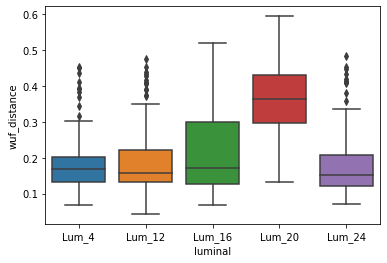

In [18]:
sns.boxplot(data = stacked_df, x = 'luminal', y = 'wuf_distance', order = ['Lum_4', 'Lum_12', 'Lum_16', 'Lum_20', 'Lum_24'])

In [19]:
stacked_df['timepoints'] = stacked_df['luminal'].str.split('_').str[1] + "_" + stacked_df['mucosal'].str.split('_').str[1]
stacked_df.head()

,luminal,mucosal,wuf_distance,timepoints
0,Lum_4,Muc_4,0.145690,4_4
1,Lum_4,Muc_24,0.169502,4_24
2,Lum_4,Muc_16,0.164934,4_16
3,Lum_4,Muc_4,0.118797,4_4
4,Lum_4,Muc_20,0.411455,4_20


In [20]:
stacked_df.timepoints.unique()

array(['4_4', '4_24', '4_16', '4_20', '4_12', '24_4', '24_24', '24_16',
       '24_20', '24_12', '16_4', '16_24', '16_16', '16_20', '16_12',
       '20_4', '20_24', '20_16', '20_20', '20_12', '12_4', '12_24',
       '12_16', '12_20', '12_12'], dtype=object)

In [21]:
zt_tps = ['4_4', '24_24','16_16', '20_20', '12_12']
stacked_df_less = stacked_df.loc[stacked_df['timepoints'].isin(zt_tps)].copy()
stacked_df_less

,luminal,mucosal,wuf_distance,timepoints
0,Lum_4,Muc_4,0.145690,4_4
3,Lum_4,Muc_4,0.118797,4_4
5,Lum_4,Muc_4,0.155336,4_4
8,Lum_4,Muc_4,0.098253,4_4
22,Lum_24,Muc_24,0.147258,24_24
...,...,...,...,...
481,Lum_16,Muc_16,0.080478,16_16
492,Lum_12,Muc_12,0.096729,12_12
495,Lum_12,Muc_12,0.119245,12_12
500,Lum_12,Muc_12,0.114963,12_12


In [22]:
stacked_df_less['zt'] = stacked_df_less['timepoints'].str.split('_').str[0]
stacked_df_less

,luminal,mucosal,wuf_distance,timepoints,zt
0,Lum_4,Muc_4,0.145690,4_4,4
3,Lum_4,Muc_4,0.118797,4_4,4
5,Lum_4,Muc_4,0.155336,4_4,4
8,Lum_4,Muc_4,0.098253,4_4,4
22,Lum_24,Muc_24,0.147258,24_24,24
...,...,...,...,...,...
481,Lum_16,Muc_16,0.080478,16_16,16
492,Lum_12,Muc_12,0.096729,12_12,12
495,Lum_12,Muc_12,0.119245,12_12,12
500,Lum_12,Muc_12,0.114963,12_12,12


<AxesSubplot:xlabel='zt', ylabel='wuf_distance'>

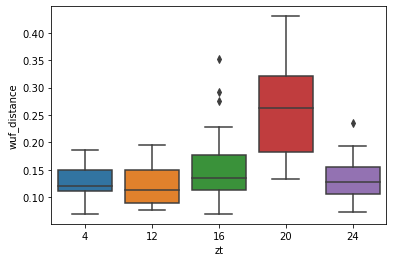

In [23]:
sns.boxplot(data = stacked_df_less, x = 'zt', y = 'wuf_distance', order=['4', '12', '16', '20', '24'])

In [24]:
stacked_df_less.sort_values(by= 'zt', inplace=True), 
stacked_df_less

,luminal,mucosal,wuf_distance,timepoints,zt
503,Lum_12,Muc_12,0.076269,12_12,12
429,Lum_12,Muc_12,0.146023,12_12,12
440,Lum_12,Muc_12,0.160413,12_12,12
240,Lum_12,Muc_12,0.089144,12_12,12
243,Lum_12,Muc_12,0.078686,12_12,12
...,...,...,...,...,...
192,Lum_4,Muc_4,0.121965,4_4,4
194,Lum_4,Muc_4,0.163815,4_4,4
197,Lum_4,Muc_4,0.080357,4_4,4
66,Lum_4,Muc_4,0.107071,4_4,4


In [25]:
stacked_df_less.wuf_distance.mean()

0.1599233771021089

In [26]:
from statannot import add_stat_annotation
import itertools

In [27]:
box_pair_2 = [(x, '20') for x in stacked_df_less['zt'].unique()]
box_pair_2

[('12', '20'), ('16', '20'), ('20', '20'), ('24', '20'), ('4', '20')]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

16 v.s. 20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.488e-03 U_stat=7.300e+01
20 v.s. 24: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.077e-05 U_stat=4.500e+02
12 v.s. 20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.400e-05 U_stat=2.800e+01
4 v.s. 20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.149e-05 U_stat=2.100e+01


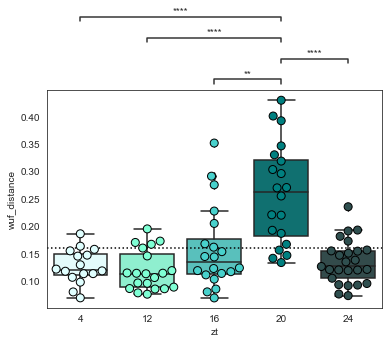

In [28]:
sns.set_style('white')
ax = sns.boxplot(data = stacked_df_less, x = 'zt', y = 'wuf_distance', 
           order=['4', '12', '16', '20', '24'], palette=['lightcyan', 'aquamarine',
                                                       'mediumturquoise', 'teal', 'darkslategrey'])

ax = sns.swarmplot(data = stacked_df_less, x = 'zt', y = 'wuf_distance', edgecolor='k', linewidth = 1, size = 8,
           order=['4', '12', '16', '20', '24'], palette=['lightcyan', 'aquamarine',
                                                       'mediumturquoise', 'teal', 'darkslategrey'])
ax, test_results = add_stat_annotation(ax, data = stacked_df_less, x = 'zt', y = 'wuf_distance', 
                                       order = ['4', '12', '16', '20', '24'], box_pairs = [('12', '20'), ('16', '20'), ('24', '20'), ('4', '20')],
                                       test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
ax.axhline(0.15992337710210888, color='k', ls= ':')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/lum_muc_boxplot.svg', dpi=300, bbox_inches="tight")

In [29]:
ittools_comb_zt = list(itertools.combinations(stacked_df_less.zt.unique(), 2))
ittools_comb_zt

[('12', '16'),
 ('12', '20'),
 ('12', '24'),
 ('12', '4'),
 ('16', '20'),
 ('16', '24'),
 ('16', '4'),
 ('20', '24'),
 ('20', '4'),
 ('24', '4')]

In [30]:
final_merged_lum_muc_Unifrac3.head()

full_sample_description,Muc_4,Muc_24,Muc_16,Muc_4,Muc_20,Muc_4,Muc_20,Muc_16,Muc_4,Muc_12,...,Muc_20,Muc_12,Muc_24,Muc_20,Muc_24,Muc_16,Muc_12,Muc_24,Muc_16,Muc_12
Lum_4,0.145690,0.169502,0.164934,0.118797,0.411455,0.155336,0.302391,0.135348,0.098253,0.188660,...,0.383425,0.197138,0.229998,0.262312,0.189453,0.150863,0.189359,0.181565,0.209196,0.197500
Lum_24,0.189113,0.147258,0.124290,0.121173,0.418908,0.139957,0.335006,0.124428,0.124991,0.100679,...,0.412555,0.087730,0.154792,0.286322,0.135231,0.157655,0.163675,0.092891,0.156456,0.118436
Lum_16,0.172421,0.168707,0.069448,0.111566,0.449391,0.127025,0.327546,0.111477,0.086338,0.131329,...,0.401304,0.107509,0.132105,0.244164,0.146575,0.117309,0.180188,0.099649,0.103742,0.110980
Lum_4,0.113776,0.136664,0.143201,0.107071,0.391722,0.147498,0.266363,0.119121,0.113622,0.181622,...,0.345728,0.187812,0.214855,0.207952,0.170225,0.097273,0.150181,0.170328,0.210307,0.179441
Lum_20,0.486184,0.427233,0.559106,0.479902,0.167289,0.502610,0.319070,0.483945,0.507387,0.474073,...,0.330509,0.525250,0.546761,0.392624,0.532726,0.506830,0.487331,0.529328,0.594245,0.493322


In [31]:
heatmap_lum_muc_unifrac = final_merged_lum_muc_Unifrac3.groupby(level=0).mean()
heatmap_lum_muc_unifrac = heatmap_lum_muc_unifrac.reindex(index = ['Lum_4', 'Lum_12', 'Lum_16', 'Lum_20','Lum_24'])
heatmap_lum_muc_unifrac

full_sample_description,Muc_4,Muc_24,Muc_16,Muc_4,Muc_20,Muc_4,Muc_20,Muc_16,Muc_4,Muc_12,...,Muc_20,Muc_12,Muc_24,Muc_20,Muc_24,Muc_16,Muc_12,Muc_24,Muc_16,Muc_12
Lum_4,0.150997,0.162254,0.140744,0.116483,0.422742,0.134061,0.313847,0.135592,0.105527,0.174873,...,0.394292,0.163714,0.199054,0.253943,0.171409,0.134302,0.179156,0.161554,0.180451,0.180516
Lum_12,0.233682,0.161892,0.148200,0.152866,0.422528,0.169362,0.360219,0.143422,0.164731,0.112168,...,0.426347,0.096656,0.145117,0.300497,0.151604,0.182618,0.164258,0.111348,0.154225,0.105187
Lum_16,0.201502,0.199897,0.148693,0.157818,0.465041,0.179918,0.352183,0.161837,0.145969,0.175710,...,0.396951,0.161468,0.192455,0.260175,0.185078,0.152221,0.217100,0.154993,0.172149,0.175559
Lum_20,0.360736,0.346365,0.418032,0.374122,0.313290,0.430859,0.266452,0.360737,0.355170,0.389701,...,0.206607,0.431764,0.457848,0.250621,0.437389,0.349783,0.375785,0.419070,0.484372,0.378727
Lum_24,0.211494,0.153455,0.127110,0.125910,0.428748,0.140904,0.349802,0.131923,0.139864,0.137904,...,0.423462,0.113989,0.148766,0.278673,0.142101,0.162476,0.186750,0.112680,0.144543,0.136708


In [32]:
heatmap_lum_muc_unifrac2 = heatmap_lum_muc_unifrac.T.groupby(level=0).mean().sort_index(axis=0)
heatmap_lum_muc_unifrac2 = heatmap_lum_muc_unifrac2.reindex(index = ['Muc_4', 'Muc_12', 'Muc_16', 'Muc_20','Muc_24'])
heatmap_lum_muc_unifrac2

,Lum_4,Lum_12,Lum_16,Lum_20,Lum_24
full_sample_description,,,,,
Muc_4,0.126767,0.180160,0.171302,0.380222,0.154543
Muc_12,0.174565,0.119567,0.182459,0.393994,0.143838
Muc_16,0.147772,0.157117,0.158725,0.403231,0.141513
Muc_20,0.346206,0.377398,0.368587,0.259243,0.370171
Muc_24,0.165368,0.143542,0.179676,0.404341,0.134932


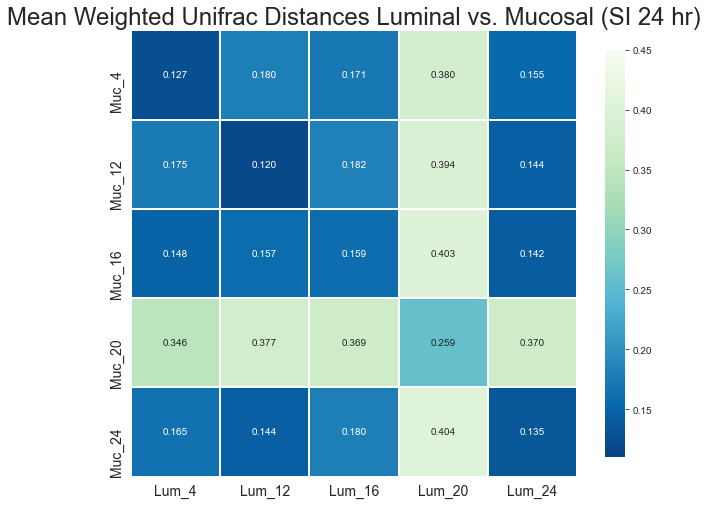

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heatmap_lum_muc_unifrac2, cmap = 'GnBu_r', linewidths=1, annot=True, fmt='.3f', square=True,
           vmin=0.11, vmax=0.45, cbar_kws={"shrink": 0.75})
sns.set(font_scale=1.5)
plt.ylabel("")
ax.set_title("Mean Weighted Unifrac Distances Luminal vs. Mucosal (SI 24 hr)", size=24)
ax.tick_params(labelsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/lum_muc_heatmap.svg', dpi=300, bbox_inches="tight")

In [34]:
minimum = heatmap_lum_muc_unifrac2.values.min()
minimum

0.11956726784515484

In [35]:
maximum = heatmap_lum_muc_unifrac2.values.max()
minimum = heatmap_lum_muc_unifrac2.values.min()
labels1 = heatmap_lum_muc_unifrac2.applymap(lambda v: str(v) if v == maximum else "")
labels2 = heatmap_lum_muc_unifrac2.applymap(lambda v: str(v) if v == minimum else "")
labelz = pd.concat([labels1, labels2])
labelz2 = labelz.groupby(level=0).sum()
labelz3 = labelz2.reindex(['Muc_4', 'Muc_12', 'Muc_16', 'Muc_20', 'Muc_24'])
labelz3

,Lum_4,Lum_12,Lum_16,Lum_20,Lum_24
full_sample_description,,,,,
Muc_4,,,,,
Muc_12,,0.11956726784515484,,,
Muc_16,,,,,
Muc_20,,,,,
Muc_24,,,,0.4043413450478465,


In [36]:
labelz3.dtypes
labelz4 = labelz3.astype(float, errors='ignore')
labelz4.dtypes

Lum_4     object
Lum_12    object
Lum_16    object
Lum_20    object
Lum_24    object
dtype: object

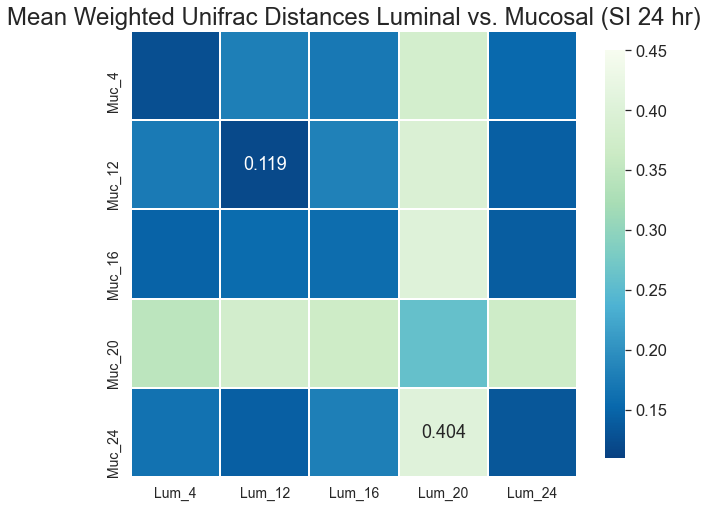

In [37]:
#making a heatplot with only the min and max mapped
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heatmap_lum_muc_unifrac2, cmap = 'GnBu_r', linewidths=1, annot=labelz4, fmt= '.5', square=True,
           vmin=0.11, vmax=0.45, cbar_kws={"shrink": 0.75})
sns.set(font_scale=1.5)
plt.ylabel("")
ax.set_title("Mean Weighted Unifrac Distances Luminal vs. Mucosal (SI 24 hr)", size=24)
ax.tick_params(labelsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/lum_muc_heatmap_min_max.svg', dpi=300, bbox_inches="tight")